In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/CharlesBookClub.csv')

In [3]:
df.describe()

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,...,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.00000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,16594.623000,0.704500,208.091500,13.390500,3.833250,26.50725,0.639750,0.30475,0.731250,...,0.125250,0.037500,0.045750,0.084500,0.885000,4.281250,3.170000,2.085750,0.084500,0.915500
std,1154.844867,9484.433792,0.456324,100.948548,8.103822,3.458386,18.35138,0.994343,0.61194,1.089413,...,0.385486,0.214721,0.220611,0.278171,1.226234,0.915619,0.928071,0.831907,0.278171,0.278171
min,1.000000,25.000000,0.000000,15.000000,2.000000,1.000000,2.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1000.750000,8253.250000,0.000000,129.000000,8.000000,1.000000,12.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,1.000000,0.000000,1.000000
50%,2000.500000,16581.000000,1.000000,208.000000,12.000000,2.000000,20.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,2.000000,0.000000,1.000000
75%,3000.250000,24838.250000,1.000000,283.000000,16.000000,6.000000,36.00000,1.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,4.000000,3.000000,0.000000,1.000000
max,4000.000000,32977.000000,1.000000,479.000000,36.000000,12.000000,99.00000,7.000000,5.00000,7.000000,...,3.000000,2.000000,2.000000,1.000000,8.000000,5.000000,4.000000,3.000000,1.000000,1.000000


In [4]:
print(df.head())

   Seq#  ID#  Gender    M   R  F  FirstPurch  ChildBks  YouthBks  CookBks  \
0     1   25       1  297  14  2          22         0         1        1   
1     2   29       0  128   8  2          10         0         0        0   
2     3   46       1  138  22  7          56         2         1        2   
3     4   47       1  228   2  1           2         0         0        0   
4     5   51       1  257  10  1          10         0         0        0   

   ...  ItalCook  ItalAtlas  ItalArt  Florence  Related Purchase  Mcode  \
0  ...         0          0        0         0                 0      5   
1  ...         0          0        0         0                 0      4   
2  ...         1          0        0         0                 2      4   
3  ...         0          0        0         0                 0      5   
4  ...         0          0        0         0                 0      5   

   Rcode  Fcode  Yes_Florence  No_Florence  
0      4      2             0            

In [5]:
df['target'] = (df['ItalCook'] > 0).astype(int)  # 1 = Bought Italian Cookbook, 0 = Not


In [6]:
X = df.drop(columns=['Seq#', 'ID#', 'target'])
y = df['target']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

[[703   0]
 [  0  97]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       703
           1       1.00      1.00      1.00        97

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



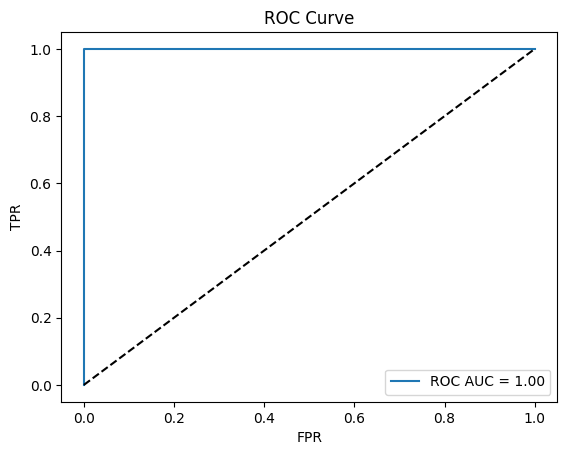

In [8]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test_scaled)
y_proba = clf.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix & Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.title("ROC Curve")
plt.show()


In [9]:
threshold = 0.3
y_pred_thresh = (y_proba >= threshold).astype(int)

print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))


[[703   0]
 [  0  97]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       703
           1       1.00      1.00      1.00        97

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Probabilities from model
y_proba = clf.predict_proba(X_test_scaled)[:, 1]

# Try a new threshold
threshold = 0.3
y_pred_new = (y_proba >= threshold).astype(int)

# Evaluate at new threshold
print(f"\nConfusion Matrix at Threshold = {threshold}:\n", confusion_matrix(y_test, y_pred_new))
print(f"\nClassification Report at Threshold = {threshold}:\n", classification_report(y_test, y_pred_new))



Confusion Matrix at Threshold = 0.3:
 [[703   0]
 [  0  97]]

Classification Report at Threshold = 0.3:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       703
           1       1.00      1.00      1.00        97

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



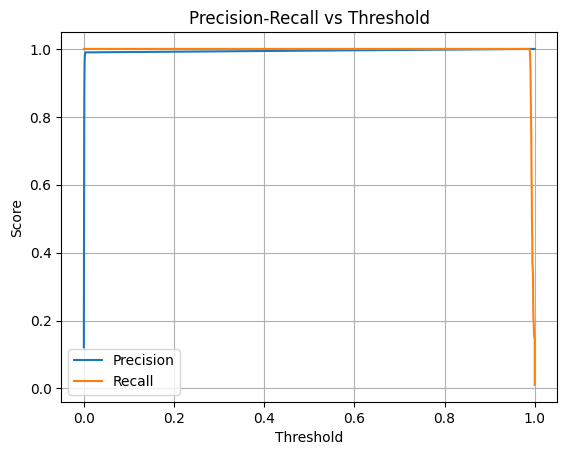

In [11]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()
